In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn import model_selection

## 4 Data Generation with QDA

In [6]:
digits = load_digits()

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

print(data.shape,data.dtype)
print(target.shape,target.dtype)

# Filter out digits 1 and 7 from data set.
target17 = np.hstack([target[target == 1],target[target == 7]])
data17 = np.vstack([data[target == 1], data[target == 7]])

print(target17.shape)
print(data17.shape)

# Separate the data into a training and a test set.
X_train, X_test, y_train, y_test = model_selection.train_test_split(data17, target17, test_size = 0.4, random_state = 0, shuffle = True)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1797, 64) float64
(1797,) int64
(361,)
(361, 64)
(216, 64) (145, 64)
(216,) (145,)


In [7]:
def fit_qda(training_features, training_labels):
    """
    The qda training
    
    params
    ------
    training_features : np.array of size N(#training) × D(feature dimension)
    training_labels : np.array of size N(#training) × 1
    
    returns 
    -------
    mu : np.array of size 2 × D(feature dimension)
    covmat : np.array of size 2 × D × D
    p : np.array of size: 1 × 2
    """
    label = np.unique(training_labels)
    N = label.shape[0]
    
    D = training_features.shape[1]
    
    mu = np.zeros([2,D])
    covmat = np.zeros([2,D,D])
    p = np.zeros(2)
    
    for i in range(N):
        features = training_features[training_labels == label[i]]
        
        mu[i] = np.mean(features, axis = 0) 
        covmat[i] = np.cov(features.T) 
        p[i] = features.shape[0]/training_features.shape[0]
        
    return mu, covmat, p

In [12]:
mu, covmat, p = fit_qda(X_train, y_train)
print(mu.shape)
print(covmat.shape)
print(p.shape)

(2, 64)
(2, 64, 64)
(2,)


In [54]:
instances_1 = np.zeros((8,64))
instances_2 = np.zeros((8,64))

instances_1 = np.random.multivariate_normal(mu[0], covmat[0], size = 8)
instances_2 = np.random.multivariate_normal(mu[1], covmat[1], size = 8)
    

<Figure size 432x288 with 0 Axes>

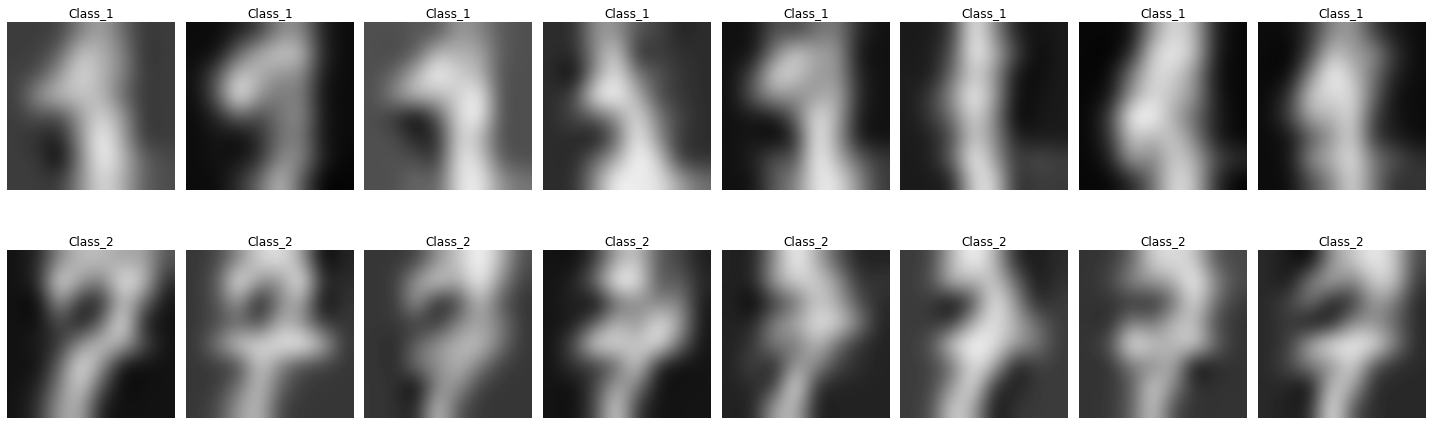

In [66]:
plt.figure()
fig, axes = plt.subplots(2, 8, figsize = (20,7))
for i in range(8):
    axes[0][i].imshow(instances_1[i].reshape((8,8)), interpolation = "bicubic")
    axes[0][i].set_title("Class_1")
    axes[0][i].axis("off")
for i in range(8):
    axes[1][i].imshow(instances_2[i].reshape((8,8)), interpolation = "bicubic")
    axes[1][i].set_title("Class_2")
    axes[1][i].axis("off")
plt.tight_layout()
plt.show()

Comments: The shape of the generated data is kind of blurry, the quailty is okay but not satisfying. We should be careful of using QDA method when the feature sapce is big.